# 타이타닉 데이터 분석 및 시각화
***train과 test 데이터 없이 titanic 불러오기!!!!!***

(데이터 분석으로 시작하여 내용이 진행될 수록 데이터 시각화가 나옵니다..)

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')

In [6]:
titanic = sns.load_dataset('titanic')

In [7]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [9]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
titanic.dropna().describe()

,survived,pclass,age,sibsp,parch,fare
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,0.675824,1.192308,35.623187,0.467033,0.478022,78.919735
std,0.469357,0.516411,15.671615,0.645007,0.755869,76.490774
min,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,1.000000,1.000000,47.750000,1.000000,1.000000,90.000000
max,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [11]:
titanic.var()

survived         0.236772
pclass           0.699015
age            211.019125
sibsp            1.216043
parch            0.649728
fare          2469.436846
adult_male       0.239723
alone            0.239723
dtype: float64

In [12]:
titanic.mad()

survived       0.473013
pclass         0.761968
age           11.322944
sibsp          0.713780
parch          0.580742
fare          28.163692
adult_male     0.478908
alone          0.478908
dtype: float64

# countplot
배에 탄 남성과 여성은 몇명인가

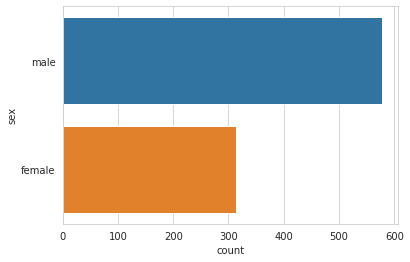

In [13]:
sns.countplot(y='sex', data=titanic)

In [14]:
titanic.groupby('class').std()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
class,,,,,,,,
First,0.484026,0.0,14.802856,0.611898,0.693997,78.380373,0.498555,0.501140
Second,0.500623,0.0,14.001077,0.601633,0.690963,13.417399,0.499911,0.497081
Third,0.428949,0.0,12.495398,1.374883,0.888861,11.778142,0.477552,0.474233


In [15]:
titanic.groupby('class')['fare'].median()

class
First     60.2875
Second    14.2500
Third      8.0500
Name: fare, dtype: float64

In [18]:
titanic.groupby('class')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
First,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0
Second,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
Third,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


In [19]:
titanic.query("alive == 'yes'").groupby('class').describe()

survived                 ...      fare                               
          count mean  std  min  ...       25%      50%         75%       max
class                           ...                                         
First     136.0  1.0  0.0  1.0  ...  50.98545  77.9583  111.481225  512.3292
Second     87.0  1.0  0.0  1.0  ...  13.00000  21.0000   26.250000   65.0000
Third     119.0  1.0  0.0  1.0  ...   7.77500   8.5167   15.875000   56.4958

[3 rows x 48 columns]

# 성별에 따른 나이의 median값

In [20]:
titanic.groupby('sex')['age'].aggregate([min, np.median, max])

,min,median,max
sex,,,
female,0.75,27.0,63.0
male,0.42,29.0,80.0


# 30살 초과인 사람들의 등급별 median 값

In [36]:
titanic.query("age>30").groupby('class').median()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
class,,,,,,,,
First,1,1,45.0,0,0,56.9292,True,False
Second,0,2,39.0,0,0,14.0000,True,True
Third,0,3,38.0,0,0,8.0500,True,True


# 비용에 따른 등급
20 이하의 비용은 1등석이 없다는 것을 볼 수 있음

In [23]:
titanic.query("fare<20").groupby('class').median()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
class,,,,,,,,
First,0,1,38.5,0,0,0.0000,True,True
Second,0,2,30.0,0,0,13.0000,True,True
Third,0,3,25.0,0,0,7.8958,True,True


# 성별과 등급에 따른 나이의 평균
남성의 나이가 등급이 높아짐에 따라 커진다

In [25]:
titanic.groupby(['class','sex'])['age'].mean().unstack()

sex,female,male
class,,
First,34.611765,41.281386
Second,28.722973,30.740707
Third,21.750000,26.507589


# catplot

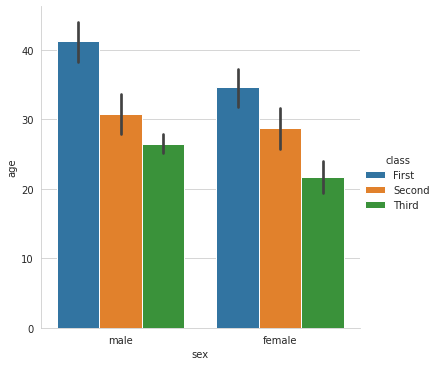

In [26]:
sns.catplot(x='sex',y='age',
            hue='class', kind='bar',
            data=titanic)

# who 를 통해 man, woman, child 비교 가능

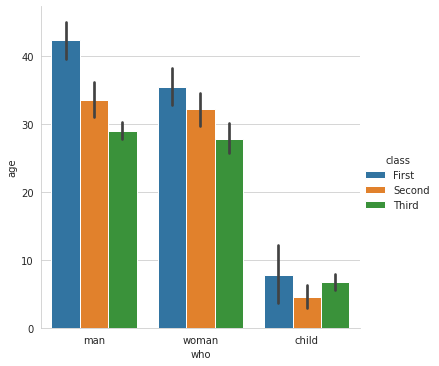

In [27]:
sns.catplot(x='who',y='age',
            hue='class', kind='bar',
            data=titanic)

# fare 비교
fare 비교를 통해 남성<여성<아이 로 비용이 커진다는 것을 알 수 있다.

이를 통해, 남성이 상대적으로 배에 많이 탄 이유를 간접적으로 알 수 있다.
(남성의 탑승비용이 저렴하기 때문!)

In [29]:
titanic.groupby(['class','who'])['fare'].mean().unstack()

who,child,man,woman
class,,,
First,139.382633,65.951086,104.317995
Second,28.323905,19.054124,20.868624
Third,23.220190,11.340213,15.354351


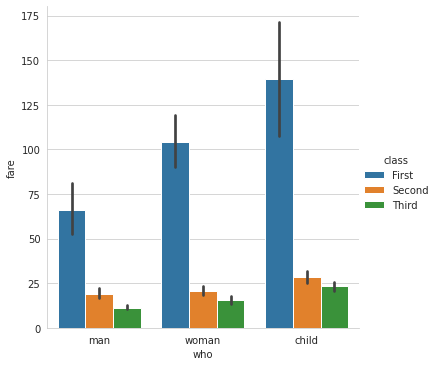

In [32]:
sns.catplot(x='who',y='fare',
            hue='class', kind='bar',
            data=titanic)

# 생존(survived) 비교
groupby와 pivot_table을 통해 표현
(둘이 같은 결과가 나온다)

In [34]:
titanic.groupby(['class', 'who'])['survived'].mean().unstack()

who,child,man,woman
class,,,
First,0.833333,0.352941,0.978022
Second,1.000000,0.080808,0.909091
Third,0.431034,0.119122,0.491228


In [35]:
titanic.pivot_table('survived', index='class', columns='who')

who,child,man,woman
class,,,
First,0.833333,0.352941,0.978022
Second,1.000000,0.080808,0.909091
Third,0.431034,0.119122,0.491228


# 성별+아이, 등급 에 따른 생존확률은 어떨까?
등급[class], 성별+아이 [who] 에 따른 [survived] 시각화하기

등급이 높아짐에 따라 생존 확률이 높다.

많은 아이들과 여성들은 각등급마다 많이 구조됨.

반면에 모든 등급에서 적은 수의 남성이 생존했음을 알 수 있음.

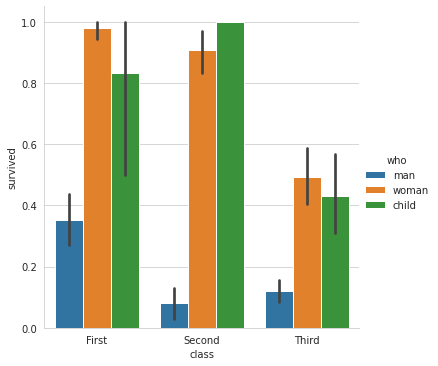

In [38]:
sns.catplot(x='class', y='survived',
            hue='who', kind='bar',
            data=titanic)


# 나이를 3등분하여 표 만들기

In [39]:
age = pd.cut(titanic['age'], [0, 18, 40, 80])
titanic.pivot_table('survived',['sex', age],'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 40]  0.979167  0.914894  0.480000
       (40, 80]  0.961538  0.846154  0.111111
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 40]  0.478261  0.063492  0.146199
       (40, 80]  0.280000  0.095238  0.064516

In [41]:
fare = pd.qcut(titanic['fare'], 3)
titanic.pivot_table('survived', ['who',age],[fare, 'class'])

fare           (-0.001, 8.662]            ... (26.0, 512.329]      
class                    First     Third  ...          Second Third
who   age                                 ...                      
child (0, 18]              NaN  0.666667  ...             1.0  0.08
man   (0, 18]              NaN  0.125000  ...             0.0  0.00
      (18, 40]             0.0  0.138462  ...             0.0  0.50
      (40, 80]             NaN  0.074074  ...             0.0   NaN
woman (0, 18]              NaN  0.666667  ...             NaN  0.00
      (18, 40]             NaN  0.550000  ...             1.0  0.25
      (40, 80]             NaN  0.000000  ...             1.0  0.00

[7 rows x 8 columns]

In [42]:
titanic.pivot_table('survived', index='who', columns='class',margins=True)

class,First,Second,Third,All
who,,,,
child,0.833333,1.000000,0.431034,0.590361
man,0.352941,0.080808,0.119122,0.163873
woman,0.978022,0.909091,0.491228,0.756458
All,0.629630,0.472826,0.242363,0.383838


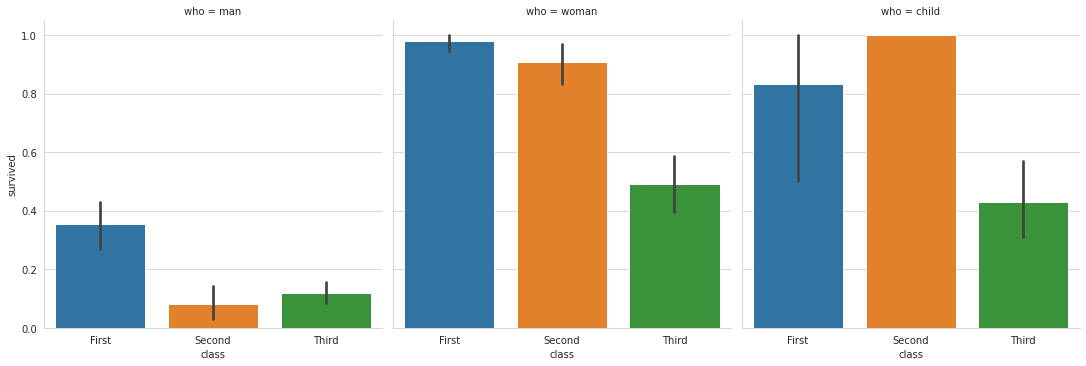

In [43]:
sns.catplot(x='class', y='survived',
            col='who', kind='bar',
            data=titanic)


# deck 으로 구분하기
deck을 시각화 시키기

In [44]:
titanic.pivot_table('survived', index='deck', columns='class',margins=True)

class,First,Second,Third,All
deck,,,,
A,0.466667,NaN,NaN,0.466667
B,0.744681,NaN,NaN,0.744681
C,0.593220,NaN,NaN,0.593220
D,0.758621,0.7500,NaN,0.757576
E,0.720000,0.7500,1.0,0.750000
F,NaN,0.8750,0.2,0.615385
G,NaN,NaN,0.5,0.500000
All,0.668571,0.8125,0.5,0.669951


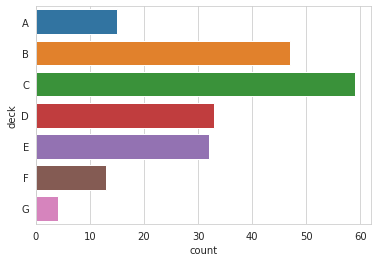

In [45]:
sns.countplot(y='deck',data=titanic);

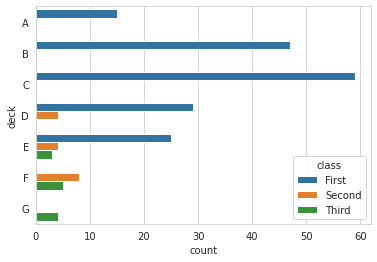

In [47]:
sns.countplot(y='deck', hue='class', data=titanic)

# deck 위치에 따른 생존자 분석

어떤 위치에 타격이 많았는지 추측 가능

F, G에 생존자가 적다. (타격이 많았음을 알 수 있다)

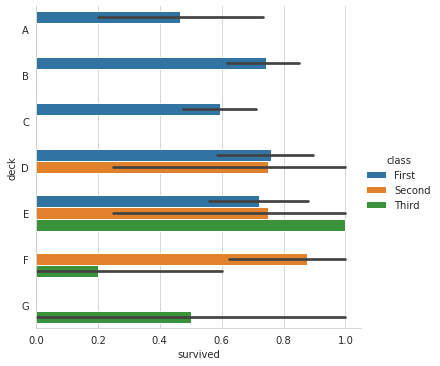

In [49]:
sns.catplot(x='survived', y='deck',
            hue='class', kind='bar',
            data=titanic)

# **탑승지에서 몇명이 탔을지**
# 과연 탑승지에 따라 생존자 수가 다를까??

탑승지에 따른 생존율 분석하기

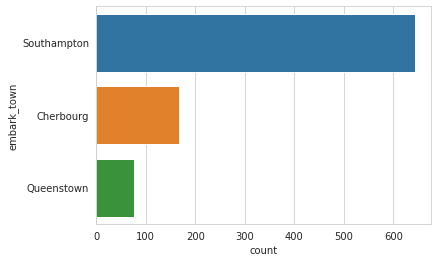

In [50]:
sns.countplot(y='embark_town', data=titanic)

# 별 차이 없음을 알 수 있다. 
생존율은 탑승지와 관련이 없다

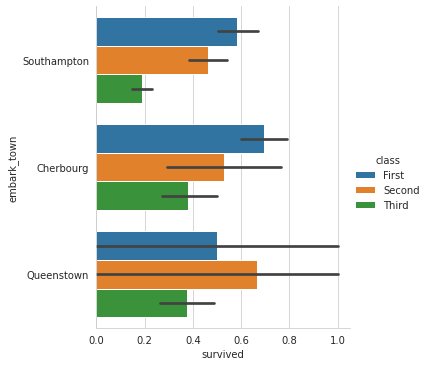

In [53]:
sns.catplot(x='survived',y='embark_town',
            hue='class', kind = 'bar',
            data=titanic)

# **형제 수에 따른 생존율 분석**
형제(자매)가 한명일때 많이 생존함을 알 수 있음

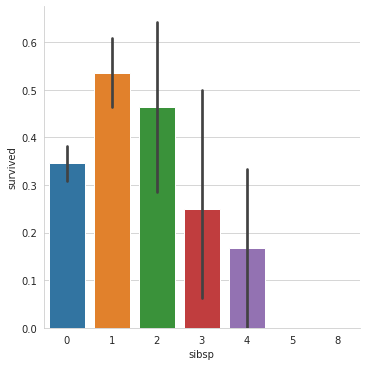

In [54]:
sns.catplot(x='sibsp',y='survived',
            kind = 'bar',
            data=titanic)

# **동반자의 유무에 따른 생존율 분석**
동반자가 있을때 생존율이 높아짐!

혼자있는 사람은 생존율이 작다는 것을 알 수 있음

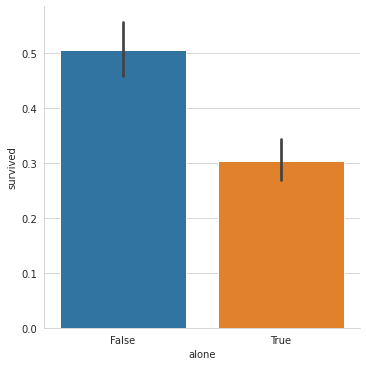

In [56]:
sns.catplot(x='alone',y='survived',
            kind = 'bar',
            data=titanic)


(train과 test 데이터 없이 시각화를 해보았다.

matplotlib를 사용하지 않고 시각화한거라서 아쉽다..)
